In [1]:
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import nltk
import os
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to C:\Users\juan
[nltk_data]     esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\juan
[nltk_data]     esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\juan
[nltk_data]     esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\juan esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to C:\Users\juan
[nltk_data]     esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\juan
[nltk_data]     esteban\AppData\Roaming\nltk_data...
[nltk_data] 

True

FIRST WE USE VADER MODEL (NLTK), THIS DOESN´T REQUIRE CONTEXT .
we will analize de positivity score 

In [2]:
df = pd.read_csv(r'./reviews.csv')
df.head()

,business_name,author_name,text,photo,rating,rating_category
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday...,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to f...,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the ph...,dataset/outdoor_atmosphere/hacinin_yeri_yasin_...,3,outdoor_atmosphere
3,Haci'nin Yeri - Yigit Lokantasi,Orhan Kapu,Turkey's cheapest artisan restaurant and its f...,dataset/indoor_atmosphere/hacinin_yeri_orhan_k...,5,indoor_atmosphere
4,Haci'nin Yeri - Yigit Lokantasi,Ozgur Sati,I don't know what you will look for in terms o...,dataset/menu/hacinin_yeri_ozgur_sati.png,3,menu


In [3]:
df.shape

(1100, 6)

In [4]:
df_b = df.groupby(['business_name','rating']).size().unstack(fill_value=0)
df_b

rating,1,2,3,4,5
business_name,,,,,
Abidin Tantuni,0,1,0,5,5
Ahsap Iskender,0,0,4,3,4
Akpinar Restaurant,3,0,1,3,4
Alavara,1,0,0,6,4
Alsancak Firin,0,1,2,3,5
...,...,...,...,...,...
Tuana Restaurant,1,0,1,7,2
Umut Pide,1,0,2,3,5
Vefa Bozacisi,1,0,2,3,5


In [5]:
df_b.dtypes

rating
1    int64
2    int64
3    int64
4    int64
5    int64
dtype: object

In [6]:
df['rating'].value_counts()

rating
5    460
4    316
3    172
1     80
2     72
Name: count, dtype: int64

BASIC NLTK 

In [7]:
example = df['text'][100]
example

'I would like to thank the service in Fethiye branch and especially Mr. Samet; the official here, for his interest and relevance.'

In [8]:
tokens = nltk.word_tokenize(example, language="english")
tokens[:10]

['I',
 'would',
 'like',
 'to',
 'thank',
 'the',
 'service',
 'in',
 'Fethiye',
 'branch']

In [9]:
nltk.download('averaged_perceptron_tagger_eng')
tagged = nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\juan esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [10]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  would/MD
  like/VB
  to/TO
  thank/VB
  the/DT
  service/NN
  in/IN
  (GPE Fethiye/NNP)
  branch/NN
  and/CC
  especially/RB
  (PERSON Mr./NNP Samet/NNP)
  ;/:
  the/DT
  official/NN
  here/RB
  ,/,
  for/IN
  his/PRP$
  interest/NN
  and/CC
  relevance/NN
  ./.)


In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [12]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'compound': 0.7906}

Run the polarity score on the whole data set

In [13]:
res={}
for index,row in tqdm(df.iterrows(),total = len(df)):
    text = row['text']
    myid = row['author_name']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1100 [00:00<?, ?it/s]

In [14]:
V = pd.DataFrame(res).T
V = V.reset_index().rename(columns={'index':'id'})
V = V.merge(df, left_on='id', right_on='author_name')
V

,id,neg,neu,pos,compound,business_name,author_name,text,photo,rating,rating_category
0,Gulsum Akar,0.042,0.899,0.059,0.3071,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday...,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste
1,Oguzhan Cetin,0.050,0.847,0.102,0.7565,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to f...,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu
2,Yasin Kuyu,0.070,0.703,0.227,0.7184,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the ph...,dataset/outdoor_atmosphere/hacinin_yeri_yasin_...,3,outdoor_atmosphere
3,Orhan Kapu,0.000,0.667,0.333,0.6114,Haci'nin Yeri - Yigit Lokantasi,Orhan Kapu,Turkey's cheapest artisan restaurant and its f...,dataset/indoor_atmosphere/hacinin_yeri_orhan_k...,5,indoor_atmosphere
4,Ozgur Sati,0.000,1.000,0.000,0.0000,Haci'nin Yeri - Yigit Lokantasi,Ozgur Sati,I don't know what you will look for in terms o...,dataset/menu/hacinin_yeri_ozgur_sati.png,3,menu
...,...,...,...,...,...,...,...,...,...,...,...
1095,Salih Gursoy,0.000,0.710,0.290,0.8479,Miss Pizza,Salih Gursoy,There are so many types of pizza; you are surp...,dataset/taste/miss_pizza_salih_gursoy.png,5,taste
1096,Kemal Amangeldi,0.000,1.000,0.000,0.0000,Miss Pizza,Kemal Amangeldi,I tried the smoked ribeye pizza; the dough is ...,dataset/indoor_atmosphere/miss_pizza_kemal_ama...,5,indoor_atmosphere
1097,Ulkem Esen,0.000,1.000,0.000,0.0000,Miss Pizza,Ulkem Esen,Crowded and expensive place.,dataset/menu/miss_pizza_ulkem_esen.png,3,menu
1098,Ilkin Saymaz,0.305,0.695,0.000,-0.7845,Miss Pizza,Ilkin Saymaz,No bad. It was very crowded; there was no ligh...,dataset/taste/miss_pizza_ilkin_saymaz.png,3,taste


In [15]:
V.dtypes

id                  object
neg                float64
neu                float64
pos                float64
compound           float64
business_name       object
author_name         object
text                object
photo               object
rating               int64
rating_category     object
dtype: object

Text(0.5, 1.0, 'compound score vs rating')

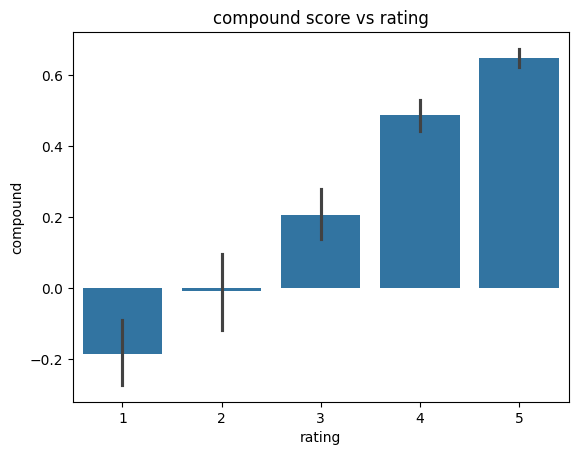

In [16]:
ax = sn.barplot(data=V, x='rating',y='compound')
ax.set_title('compound score vs rating')

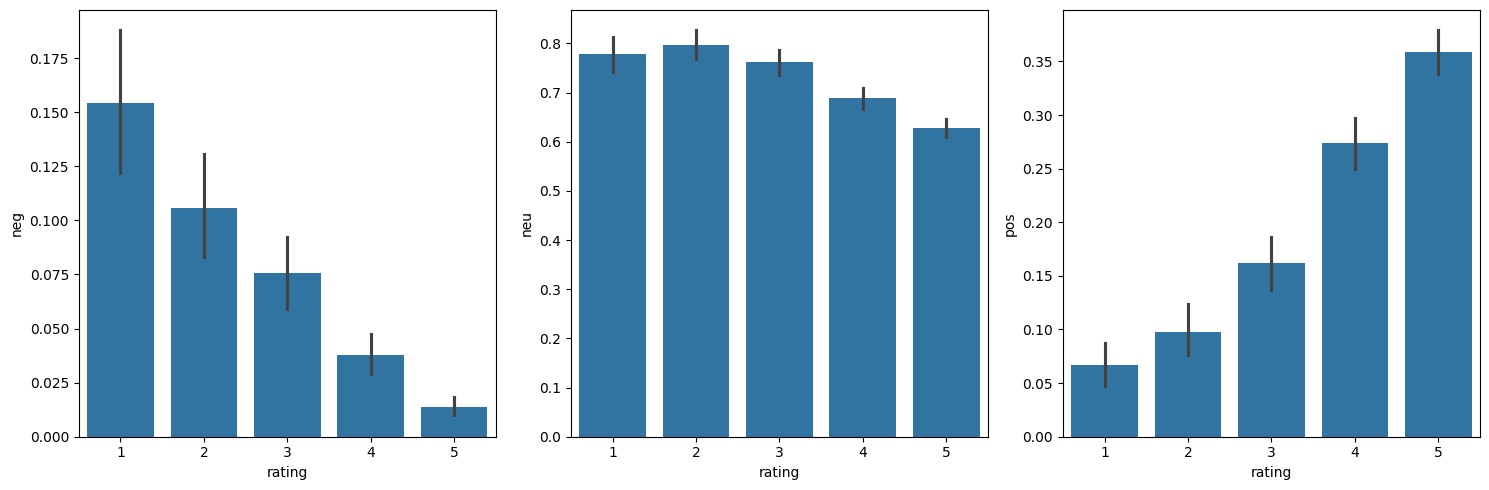

In [17]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sn.barplot(data=V, x='rating',y='neg', ax=axs[0])
sn.barplot(data=V, x='rating',y='neu', ax=axs[1])
sn.barplot(data=V, x='rating',y='pos', ax=axs[2])
plt.tight_layout()
plt.show()

NOW WE WILL TRY USING ROBERTA MODEL

this model gives us a deeper analysis but at the same time is more resource consuming

In [53]:
!pip install transformers 
!pip install scipy


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
import torch
from scipy.special import softmax 

In [19]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

c:\Users\juan esteban\Documents\GitHub\mi_entorno\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\juan esteban\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment-latest. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [26]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores =output[0][0].detach().numpy()
scores = softmax(scores)
scores
scores_dict = {'r_neg' : scores[0],
               'r_neu' : scores[1],
               'r_pos' : scores[2]
               }
print(scores_dict)

{'r_neg': np.float32(0.005487575), 'r_neu': np.float32(0.115654625), 'r_pos': np.float32(0.8788578)}


In [27]:
def roberta_scores_polarity (example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores =output[0][0].detach().numpy()
    scores = softmax(scores)
    scores
    scores_dict = {'r_neg' : scores[0],
                'r_neu' : scores[1],
                'r_pos' : scores[2]
                }
    return(scores_dict)

In [41]:
rob_res ={}
for index,row in tqdm(df.iterrows(),total = len(df)):
    text = row['text'] 
    myid = row['author_name']
    roberta_result = roberta_scores_polarity(text) 
    rob_res[myid] = roberta_result

  0%|          | 0/1100 [00:00<?, ?it/s]

In [42]:
rob_res

{'Gulsum Akar': {'r_neg': np.float32(0.012659974),
  'r_neu': np.float32(0.3903292),
  'r_pos': np.float32(0.5970108)},
 'Oguzhan Cetin': {'r_neg': np.float32(0.0045655635),
  'r_neu': np.float32(0.049225956),
  'r_pos': np.float32(0.9462084)},
 'Yasin Kuyu': {'r_neg': np.float32(0.107337095),
  'r_neu': np.float32(0.28648886),
  'r_pos': np.float32(0.606174)},
 'Orhan Kapu': {'r_neg': np.float32(0.0023788135),
  'r_neu': np.float32(0.012454639),
  'r_pos': np.float32(0.9851665)},
 'Ozgur Sati': {'r_neg': np.float32(0.040659674),
  'r_neu': np.float32(0.36318406),
  'r_pos': np.float32(0.5961563)},
 'Arda Karaca': {'r_neg': np.float32(0.015197126),
  'r_neu': np.float32(0.06226173),
  'r_pos': np.float32(0.9225412)},
 'İrem Eren': {'r_neg': np.float32(0.007389105),
  'r_neu': np.float32(0.10521519),
  'r_pos': np.float32(0.8873957)},
 'Nadia Salim': {'r_neg': np.float32(0.0046389536),
  'r_neu': np.float32(0.010119099),
  'r_pos': np.float32(0.98524195)},
 'Mehmet Eser': {'r_neg': np.f

In [46]:
R = pd.DataFrame(rob_res).T

In [58]:
V.drop('V_id', axis='columns',inplace=True)

In [ ]:
print(R.columns)  
print(V.columns)  

Index(['r_neg', 'r_neu', 'r_pos'], dtype='object')
Index(['neg', 'neu', 'pos', 'compound', 'business_name', 'author_name', 'text',
       'photo', 'rating', 'rating_category'],
      dtype='object')
